In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv( "DD1(Oct).csv" )
df

,Time,Ref. O3(ppb),Ref. NO2(ppb),Temp(C),RH(%),no2op1(mV),no2op2(mV),o3op1(mV),o3op2(mV),Valid
0,04-10-2019 17:57,47.470,20.993,28.6,92.8,180.0,159.0,205.0,187.0,1
1,04-10-2019 17:58,41.330,21.820,28.6,93.3,180.0,158.0,204.0,187.0,1
2,04-10-2019 17:59,42.503,26.200,28.5,93.5,179.0,159.0,206.0,187.0,1
3,04-10-2019 18:00,48.040,20.493,28.5,93.6,181.0,160.0,206.0,188.0,1
4,04-10-2019 18:01,48.293,18.150,28.5,93.7,180.0,161.0,205.0,189.0,1
...,...,...,...,...,...,...,...,...,...,...
32699,27-10-2019 10:56,97.917,5.027,NaN,NaN,NaN,NaN,NaN,NaN,0
32700,27-10-2019 10:57,92.633,5.835,NaN,NaN,NaN,NaN,NaN,NaN,0
32701,27-10-2019 10:58,96.353,5.916,NaN,NaN,NaN,NaN,NaN,NaN,0
32702,27-10-2019 10:59,99.303,5.693,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
selected_cols =  [ 0, 1, 3, 4, 7, 8 ]
df2 = df.loc[ df.Valid == 1 ].iloc[ :, selected_cols ].copy()
df2

,Time,Ref. O3(ppb),Temp(C),RH(%),o3op1(mV),o3op2(mV)
0,04-10-2019 17:57,47.470,28.6,92.8,205.0,187.0
1,04-10-2019 17:58,41.330,28.6,93.3,204.0,187.0
2,04-10-2019 17:59,42.503,28.5,93.5,206.0,187.0
3,04-10-2019 18:00,48.040,28.5,93.6,206.0,188.0
4,04-10-2019 18:01,48.293,28.5,93.7,205.0,189.0
...,...,...,...,...,...,...
31405,26-10-2019 13:22,74.620,29.1,66.4,197.0,185.0
31406,26-10-2019 13:23,80.923,29.1,66.5,203.0,184.0
31407,26-10-2019 13:24,82.820,29.1,67.5,203.0,183.0
31408,26-10-2019 13:25,82.963,29.1,66.3,199.0,183.0


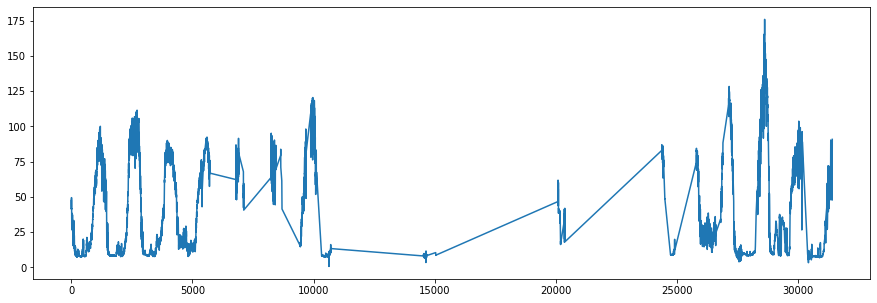

In [4]:
plt.figure( figsize = ( 15, 5 ) )
plt.plot( df2["Ref. O3(ppb)"] )

In [5]:
def multisplit( string, delimiters ):
    # For a single delimiter character, the library method suffices
    if len( delimiters ) == 1:
        return string.split( delimiters[0] )
    
    # If there are multiple delimiter characters, replace all by the first
    d = delimiters[ 0 ]
    for c in delimiters[ 1: ]:
        string = string.replace( c, d )
    return string.split( d )

df2[ "Time" ] = df2[ "Time" ].map( lambda datetime: int( multisplit( datetime, " -:" )[-2] ) )
df2

,Time,Ref. O3(ppb),Temp(C),RH(%),o3op1(mV),o3op2(mV)
0,17,47.470,28.6,92.8,205.0,187.0
1,17,41.330,28.6,93.3,204.0,187.0
2,17,42.503,28.5,93.5,206.0,187.0
3,18,48.040,28.5,93.6,206.0,188.0
4,18,48.293,28.5,93.7,205.0,189.0
...,...,...,...,...,...,...
31405,13,74.620,29.1,66.4,197.0,185.0
31406,13,80.923,29.1,66.5,203.0,184.0
31407,13,82.820,29.1,67.5,203.0,183.0
31408,13,82.963,29.1,66.3,199.0,183.0


In [6]:
# Random splits not advisable for time series datasets
# train, test = train_test_split( df2, train_size = 0.8 )

train_frac = 0.8
train_size = int( len( df2 ) * train_frac )

train = df2.iloc[ :train_size, : ]
test = df2.iloc[ train_size:, :]

means = train.mean()
stds = train.std()
train

,Time,Ref. O3(ppb),Temp(C),RH(%),o3op1(mV),o3op2(mV)
0,17,47.470,28.6,92.8,205.0,187.0
1,17,41.330,28.6,93.3,204.0,187.0
2,17,42.503,28.5,93.5,206.0,187.0
3,18,48.040,28.5,93.6,206.0,188.0
4,18,48.293,28.5,93.7,205.0,189.0
...,...,...,...,...,...,...
28551,13,128.233,30.7,59.3,223.0,185.0
28552,13,125.733,30.7,59.4,221.0,186.0
28553,13,128.433,30.7,59.5,221.0,186.0
28554,13,117.567,30.7,59.6,222.0,188.0


In [7]:
# Numerical solvers may misbehave if data is not properly normalized
train_cent = ( ( train - means ) / stds ).copy()
test_cent = ( ( test - means ) / stds ).copy()
train_cent

,Time,Ref. O3(ppb),Temp(C),RH(%),o3op1(mV),o3op2(mV)
0,0.724837,0.278398,0.642642,0.600789,0.358565,0.124321
1,0.724837,0.089971,0.642642,0.633806,0.323700,0.124321
2,0.724837,0.125969,0.609619,0.647013,0.393429,0.124321
3,0.863693,0.295890,0.609619,0.653617,0.393429,0.162231
4,0.863693,0.303654,0.609619,0.660220,0.358565,0.200142
...,...,...,...,...,...,...
28551,0.169413,2.756885,1.336116,-1.611383,0.986128,0.048500
28552,0.169413,2.680164,1.336116,-1.604779,0.916399,0.086411
28553,0.169413,2.763023,1.336116,-1.598176,0.916399,0.086411
28554,0.169413,2.429563,1.336116,-1.591572,0.951263,0.162231


In [8]:
feat_idx = [ 0, 2, 3, 4, 5 ]
label_idx = 1
reg = linear_model.Ridge( alpha = 0.01 )
reg.fit( train_cent.iloc[ :, feat_idx ], train_cent.iloc[ :, label_idx ] )
pred = reg.predict( test_cent.iloc[ :, feat_idx ] ) * stds[ label_idx ] + means[ label_idx ]
gold = test.iloc[ :, label_idx ]
mean_absolute_error( gold, pred )

15.551690262336571

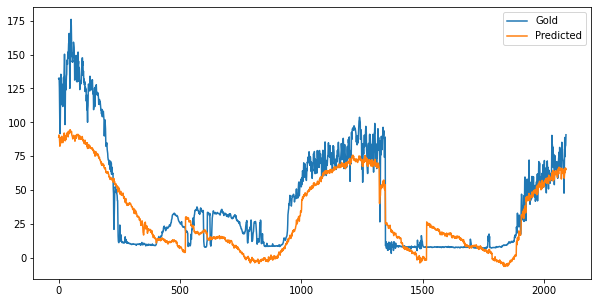

In [9]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( range( len( gold ) ), gold, label = "Gold" )
plt.plot( range( len( pred ) ), pred, label = "Predicted" )
plt.legend()

Max 135.8, min 0.679


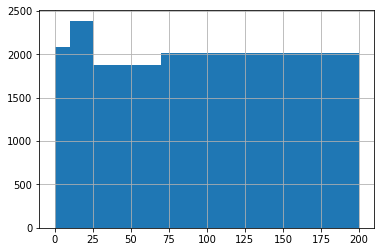

In [10]:
X = train_cent.iloc[ :, feat_idx ]
y = train_cent.iloc[ :, label_idx ]
y_orig = train.iloc[ :, label_idx ]

print( f"Max {max( y_orig )}, min {min( y_orig )}" )

# bins = [ 0, 25, 200 ]
bins = [ 0, 10, 25, 70, 200 ]
# bins = [ 0, 8.5, 10, 15, 25, 45, 70, 85, 200 ]

plt.hist( y_orig, bins = bins )
plt.grid()

In [11]:
def doEStep( X, y, models ):
#     variance = 0.08
    residuals = np.zeros( ( len( y ), len( models ) ) )
    
    for c, model in enumerate( models ):
        residuals[ :, c ] = model.predict( X ) - y
        
    qVals = np.zeros_like( residuals )
    bestComponent = np.argmin( np.abs( residuals ), axis = 1 )
    qVals[ np.arange( len( bestComponent ) ), bestComponent ] = 1
    return qVals

def doMStep( X, y, qVals, models ):
    # Process every component
    for c, model in enumerate( models ):
        # Get hold of the weights different data points have given to this component
        q = qVals[:, c]
        amountData = sum( q )
        # If there is enough data for this component, do weighted least squares to get the weighted MLE
        if amountData > 10:
            model.fit( X, y, sample_weight = q )
        # If some component is almost empty, return the old value of the model for this component
        else:
            print( f"Underpopulated cluster #{c} with only {amountData} points" ) 
    return models

def doEMMR( X, y, models, n_iter = 10 ):
    for t in range( n_iter ):
        qVals = doEStep( X, y, models )
        models = doMStep( X, y, qVals, models )
    return models

n = 40

n_components = len( bins ) - 1
models = []

for c in range( n_components ):
    model = linear_model.Ridge( alpha = 0.01 )
    idx = y_orig[ y_orig >= bins[ c ] ][y_orig < bins[ c + 1 ]].index
    model.fit( X.loc[idx], y[idx] )
    models.append( model )

models = doEMMR( X, y, models, n_iter = 20 )

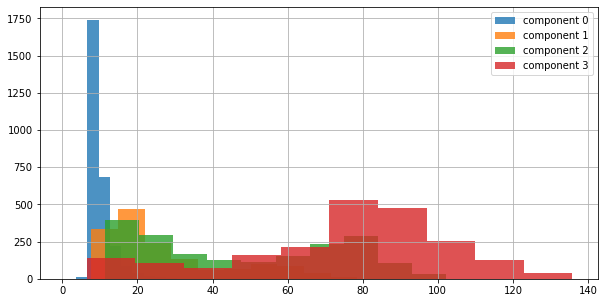

In [12]:
residuals = np.zeros( ( len( y ), len( models ) ) )

for c, model in enumerate( models ):
    residuals[ :, c ] = np.abs( model.predict( X ) * stds[ label_idx ] + means[ label_idx ]  - y_orig )

assignment = np.argmin( residuals, axis = 1 )

plt.figure( figsize = ( 10, 5 ) )
for c in np.unique( assignment ):
    plt.hist( train[ "Ref. O3(ppb)" ][ assignment == c ], label = f"component {c}", alpha = 0.8 )

plt.legend()
plt.grid()

In [13]:
# This performance is unrealistic
np.mean( np.min( residuals, axis = 1 ) )

2.9571783822231024

In [14]:
# Need to train an auxiliary model to send a data point to a good model at test time
# Can do this using clustering, multi-class classification etc
clf = svm.LinearSVC( max_iter = 5000 )
clf.fit( X, assignment )
pred_comp = clf.predict( X )

pred_residuals = residuals[ np.arange( len( pred_comp ) ), pred_comp ]

np.mean( pred_residuals )

9.169333319020327

In [15]:
X_t = test_cent.iloc[ :, feat_idx ]
y_t = test.iloc[ :, label_idx ]

pred_comp_t = clf.predict( X_t )

residuals_t = np.zeros( ( len( y_t ), len( models ) ) )
pred_t = np.zeros( ( len( y_t ), len( models ) ) )

for c, model in enumerate( models ):
    pred_t[ :, c ] = model.predict( X_t ) * stds[ label_idx ] + means[ label_idx ]
    residuals_t[ :, c ] = np.abs( pred_t[ :, c ] - y_t )

pred_residuals_t = residuals_t[ np.arange( len( pred_comp_t ) ), pred_comp_t ]
final_pred_t = pred_t[ np.arange( len( pred_comp_t ) ), pred_comp_t ]

np.mean( pred_residuals_t )

9.908328905218422

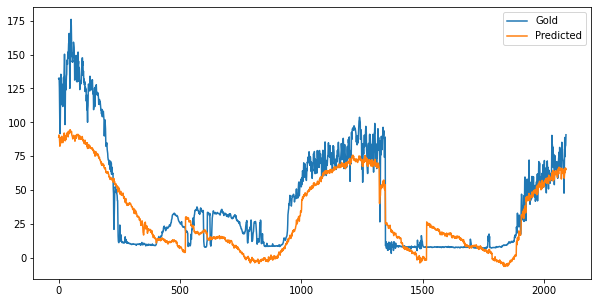

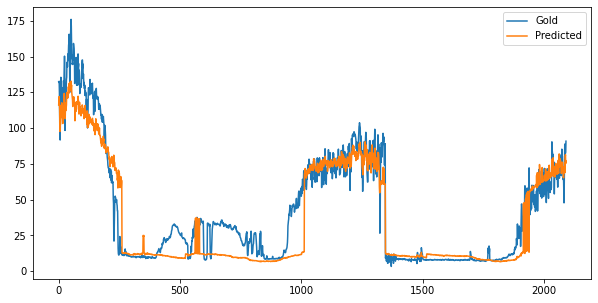

In [16]:
plt.figure( figsize = ( 10, 5 ) )
plt.plot( range( len( gold ) ), gold, label = "Gold" )
plt.plot( range( len( pred ) ), pred, label = "Predicted" )
plt.legend()

plt.figure( figsize = ( 10, 5 ) )
plt.plot( range( len( gold ) ), y_t, label = "Gold" )
plt.plot( range( len( pred ) ), final_pred_t, label = "Predicted" )
plt.legend()